In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# df = pd.read_csv("C:\\Downloads\\internship.csv")
df = pd.read_csv("C:\\Users\\JAY\\Desktop\\Credit Card\\data_credit_card_customer_seg.csv")

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df = df.round(2)

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
print("Mean: "+str(round(df['MINIMUM_PAYMENTS'].mean(), 2)))
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(round(df['MINIMUM_PAYMENTS'].mean(), 2))

Mean: 864.21


In [10]:
print("Mean: "+str(round(df['CREDIT_LIMIT'].mean(), 2)))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean(), 2))

Mean: 4494.45


In [11]:
del df['CUST_ID']
df.shape

(8950, 17)

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474826,0.877426,1003.204834,592.437371,411.067645,978.871102,0.490217,0.202177,0.364553,0.134911,3.248827,14.709832,4494.449450,1733.143878,864.206687,0.153534,11.517318
std,2081.531851,0.237169,2136.634782,1659.887917,904.338115,2097.163869,0.401678,0.298555,0.397623,0.200262,6.824647,24.857649,3638.612412,2895.063787,2330.588020,0.292648,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.020000,0.000000,6.000000
25%,128.280000,0.890000,39.635000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,170.857500,0.000000,12.000000
50%,873.385000,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.080000,0.170000,0.000000,0.000000,7.000000,3000.000000,856.900000,335.630000,0.000000,12.000000
75%,2054.137500,1.000000,1110.130000,577.405000,468.637500,1113.822500,0.920000,0.300000,0.750000,0.220000,4.000000,17.000000,6500.000000,1901.135000,864.210000,0.140000,12.000000
max,19043.140000,1.000000,49039.570000,40761.250000,22500.000000,47137.210000,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.480000,76406.210000,1.000000,12.000000


In [13]:
df['TOTAL_TXN'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_TXN'].describe()

count    8950.000000
mean       17.958659
std        25.338356
min         0.000000
25%         4.000000
50%        10.000000
75%        21.000000
max       358.000000
Name: TOTAL_TXN, dtype: float64

<AxesSubplot:>

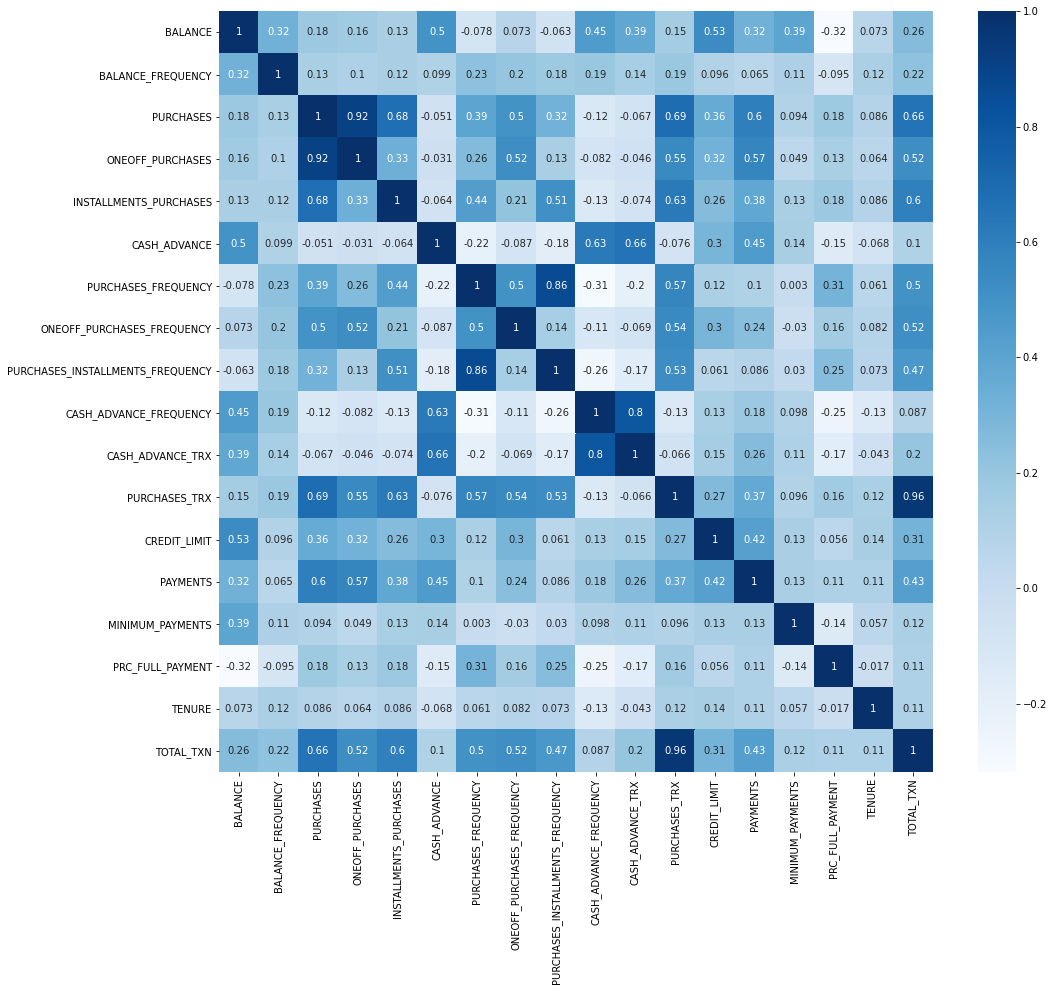

In [14]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [15]:
del df['BALANCE_FREQUENCY']
df.shape

(8950, 17)

In [16]:
del df['TENURE']
df.shape

(8950, 16)

In [17]:
#removing purchases because its total is added up in the total txn
del df['PURCHASES']
df.shape

(8950, 15)

In [18]:
del df['CASH_ADVANCE']
df.shape

(8950, 14)

In [19]:
del df['ONEOFF_PURCHASES_FREQUENCY']
df.shape

(8950, 13)

In [20]:
df.describe()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474826,592.437371,411.067645,0.490217,0.364553,0.134911,3.248827,14.709832,4494.449450,1733.143878,864.206687,0.153534,17.958659
std,2081.531851,1659.887917,904.338115,0.401678,0.397623,0.200262,6.824647,24.857649,3638.612412,2895.063787,2330.588020,0.292648,25.338356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.020000,0.000000,0.000000
25%,128.280000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,170.857500,0.000000,4.000000
50%,873.385000,38.000000,89.000000,0.500000,0.170000,0.000000,0.000000,7.000000,3000.000000,856.900000,335.630000,0.000000,10.000000
75%,2054.137500,577.405000,468.637500,0.920000,0.750000,0.220000,4.000000,17.000000,6500.000000,1901.135000,864.210000,0.140000,21.000000
max,19043.140000,40761.250000,22500.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.480000,76406.210000,1.000000,358.000000


In [21]:
del df['PURCHASES_FREQUENCY']
df.shape

(8950, 12)

In [22]:
del df['CASH_ADVANCE_FREQUENCY']
df.shape

(8950, 11)

In [23]:
del df['MINIMUM_PAYMENTS']
df.shape

(8950, 10)

In [24]:
df.describe()

,BALANCE,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474826,592.437371,411.067645,0.364553,3.248827,14.709832,4494.449450,1733.143878,0.153534,17.958659
std,2081.531851,1659.887917,904.338115,0.397623,6.824647,24.857649,3638.612412,2895.063787,0.292648,25.338356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,128.280000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.272500,0.000000,4.000000
50%,873.385000,38.000000,89.000000,0.170000,0.000000,7.000000,3000.000000,856.900000,0.000000,10.000000
75%,2054.137500,577.405000,468.637500,0.750000,4.000000,17.000000,6500.000000,1901.135000,0.140000,21.000000
max,19043.140000,40761.250000,22500.000000,1.000000,123.000000,358.000000,30000.000000,50721.480000,1.000000,358.000000


In [25]:
del df['INSTALLMENTS_PURCHASES']
df.shape

(8950, 9)

In [26]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df)

In [27]:
scaled_df.shape

(8950, 9)

In [28]:
scaled_df

array([[-0.73198974, -0.35693402, -0.71567527, ..., -0.52897951,
        -0.52466626, -0.6298574 ],
       [ 0.78696211, -0.35693402, -0.9168821 , ...,  0.81864121,
         0.22713151, -0.55092127],
       [ 0.44713569,  0.10888851, -0.9168821 , ..., -0.38380362,
        -0.52466626, -0.23517675],
       ...,
       [-0.74039748, -0.35693402,  0.7682251 , ..., -0.57061477,
         0.32964939, -0.51145321],
       [-0.74517307, -0.35693402, -0.9168821 , ..., -0.58053566,
         0.32964939, -0.6298574 ],
       [-0.57257419,  0.30173158, -0.9168821 , ..., -0.57686714,
        -0.52466626,  0.2779081 ]])

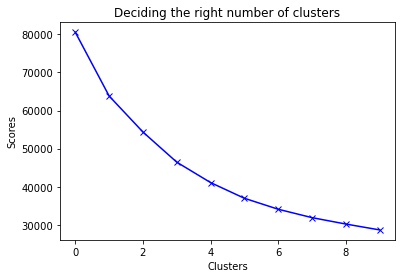

In [29]:
scores_1 = []

range_values = range(1, 11)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Deciding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

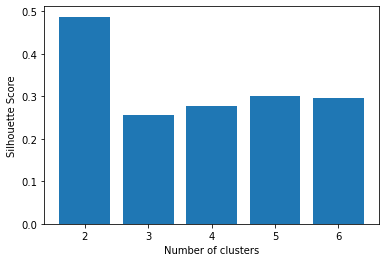

In [30]:
silhouette_scores = []

for n_cluster in range(2, 7):
    silhouette_scores.append( 
        silhouette_score(scaled_df, KMeans(n_clusters = n_cluster).fit_predict(scaled_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [31]:
# Apply K-means algorithms
kmeans = KMeans(5)
kmeans.fit(scaled_df)
labels = kmeans.labels_

In [32]:
kmeans.cluster_centers_.shape

(5, 9)

In [33]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN,cluster
0,40.90,0.00,0.08,0,2,1000.0,201.80,0.00,2,0
1,3202.47,0.00,0.00,4,0,7000.0,4103.03,0.22,4,0
2,2495.15,773.17,0.00,0,12,7500.0,622.07,0.00,12,0
3,1666.67,1499.00,0.00,1,1,7500.0,0.00,0.00,2,0
4,817.71,16.00,0.00,0,1,1200.0,678.33,0.00,1,0


In [34]:
clusters['cluster'].value_counts()

0    4245
3    2135
4    1195
1    1114
2     261
Name: cluster, dtype: int64

In [35]:
clusters.groupby('cluster').mean()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
cluster,,,,,,,,,
0,1065.620678,261.249852,0.078398,2.584923,3.697998,3216.088210,955.176276,0.038523,6.282921
1,5243.754497,537.462513,0.212460,12.504488,9.271993,8942.284156,3799.579120,0.025916,21.776481
2,4025.509349,5900.139732,0.841648,4.210728,114.440613,9985.057471,9038.955364,0.262835,118.651341
3,1135.980651,590.182009,0.831775,1.266979,25.082436,3853.171293,1395.118496,0.067316,26.349415
4,134.703573,664.937699,0.583900,0.309623,18.582427,4835.734619,1578.609155,0.811222,18.892050


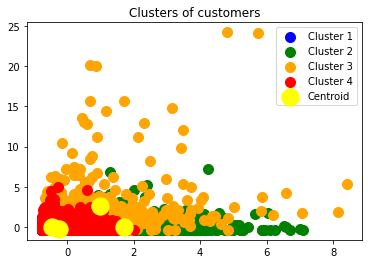

In [36]:
kmean = KMeans(4)
kmean.fit(scaled_df)
labels = kmean.labels_

kmeans = KMeans(n_clusters=4, init='k-means++')
y_predict= kmeans.fit_predict(scaled_df)

plt.scatter(scaled_df[y_predict == 0, 0], scaled_df[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(scaled_df[y_predict == 1, 0], scaled_df[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(scaled_df[y_predict == 2, 0], scaled_df[y_predict == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(scaled_df[y_predict == 3, 0], scaled_df[y_predict == 3, 1], s = 100, c = 'red', label = 'Cluster 4')
# plt.scatter(scaled_data[y_predict == 4, 0], scaled_data[y_predict == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
# plt.scatter(scaled_data[y_predict == 5, 0], scaled_data[y_predict == 5, 1], s = 100, c = 'violet', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [37]:
# Principal component analysis
pca = PCA(n_components=2)
principal = pca.fit_transform(scaled_df)
principal

array([[-1.64276373, -0.25567615],
       [-0.17390314,  1.3032414 ],
       [-0.22899578,  0.81019155],
       ...,
       [-1.09502797, -1.25827688],
       [-1.68864835, -0.42019498],
       [-0.52287704, -0.28434092]])

In [38]:
# Create a new dataframe with the two components
pca_df = pd.DataFrame(data = principal, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.642764,-0.255676
1,-0.173903,1.303241
2,-0.228996,0.810192
3,-0.620946,0.765740
4,-1.559565,0.078363


In [39]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.642764,-0.255676,1
1,-0.173903,1.303241,1
2,-0.228996,0.810192,1
3,-0.620946,0.765740,1
4,-1.559565,0.078363,1


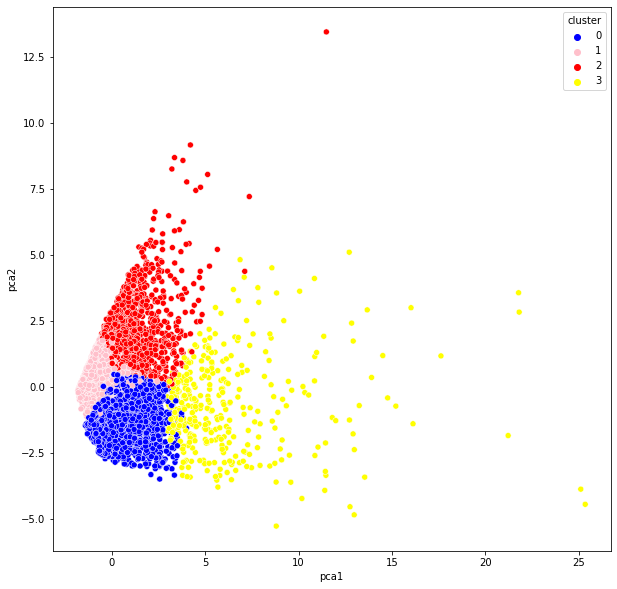

In [40]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data =pca_df , palette =['blue','pink','red','yellow'])
plt.show()

In [41]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters['cluster'].value_counts()

1    4375
0    3025
2    1190
3     360
Name: cluster, dtype: int64

In [42]:
clusters.groupby('cluster').mean()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
cluster,,,,,,,,,
0,628.034218,547.417874,0.751421,0.766281,21.378843,4069.071656,1357.402618,0.361074,22.145124
1,1078.585054,273.514453,0.091394,2.586286,4.095543,3195.126005,962.054283,0.036466,6.681829
2,5114.452017,553.598143,0.240092,11.874790,10.041176,8947.440798,3759.096681,0.029294,21.915966
3,3603.440750,4974.910778,0.844833,3.647222,103.097222,9139.583333,7564.395139,0.243000,106.744444


Text(0.5, 0, 'CLUSTERS')

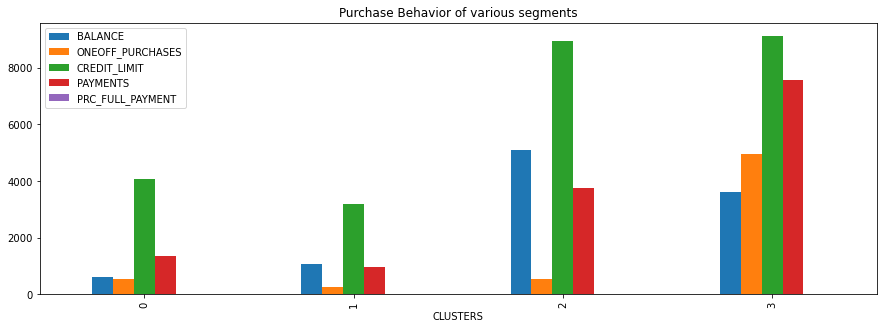

In [63]:
(clusters[['BALANCE', 'ONEOFF_PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('CLUSTERS')b

INSIGHTS
Cluster 0 has customers with high credit limit but they have low balance and spend less so we cangive them some schemes so they can spend more accordingly
Cluster 1 has the lowest credit limit amongst the other customers but they spend more comparatively and can be encouraged to spend more , these customers can fall under Tier 3 or silver credit cards
Cluster 2 has a quiet good credit limit and a good blance but very less one of purchase so these customers dont spend much at a time so schemes can be given accordingly , they might have a gold credit card
Cluster 3 has the highest credit limit of all clusters but its balance is comaratively lower but these customers have a higher one of purchase so they actually spend a huge amount at a time and can be encouraged , these maybe the tier 1 customers who have a platinum credit card

In [66]:
clusters.head()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN,cluster
0,40.90,0.00,0.08,0,2,1000.0,201.80,0.00,2,1
1,3202.47,0.00,0.00,4,0,7000.0,4103.03,0.22,4,1
2,2495.15,773.17,0.00,0,12,7500.0,622.07,0.00,12,1
3,1666.67,1499.00,0.00,1,1,7500.0,0.00,0.00,2,1
4,817.71,16.00,0.00,0,1,1200.0,678.33,0.00,1,1


In [67]:
clusters.columns

Index(['BALANCE', 'ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'PRC_FULL_PAYMENT', 'TOTAL_TXN', 'cluster'],
      dtype='object')

In [96]:
# Putting feature variable to X
X = clusters.drop(['cluster'], axis=1)
X.head()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
0,40.90,0.00,0.08,0,2,1000.0,201.80,0.00,2
1,3202.47,0.00,0.00,4,0,7000.0,4103.03,0.22,4
2,2495.15,773.17,0.00,0,12,7500.0,622.07,0.00,12
3,1666.67,1499.00,0.00,1,1,7500.0,0.00,0.00,2
4,817.71,16.00,0.00,0,1,1200.0,678.33,0.00,1


In [97]:
y = clusters['cluster']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int32

In [98]:
clusters['cluster'].value_counts()

1    4375
0    3025
2    1190
3     360
Name: cluster, dtype: int64

In [99]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
clf=KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
accuracy=clf.score(X_train, y_train)
print(accuracy)

0.7948922585794094


In [100]:
X_test.head()

,BALANCE,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT,TOTAL_TXN
7216,1854.03,576.00,0.33,5,15,2000.0,654.47,0.00,20
1143,4613.57,0.00,0.00,1,0,6000.0,922.22,0.00,1
4925,129.84,743.99,0.64,0,19,4000.0,1363.13,0.88,19
5948,2583.25,45.65,1.00,18,21,3000.0,819.79,0.00,39
349,21.58,0.00,0.67,0,16,5000.0,344.16,0.80,16


In [104]:
example = np.array([[1854.03,576.00,0.33,5,15,2000.0,654.47,0.00,20]])
prediction=clf.predict(example)
print(prediction)

[1]


In [114]:
filename = 'modelR.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [115]:
loaded_model = pickle.load(open(filename, 'rb'))

In [116]:
prediction=loaded_model.predict(example)
print(prediction)

[1]
